In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils

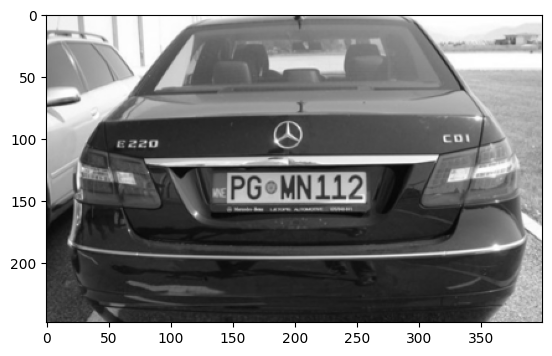

In [3]:
image_file = "images/Cars250.png" # this thing works perfectly for 250
img = cv2.imread(image_file)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

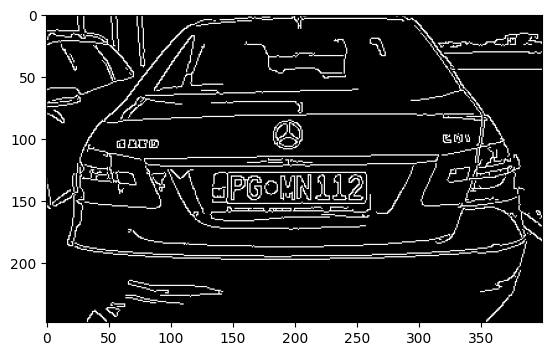

In [4]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 40, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [5]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

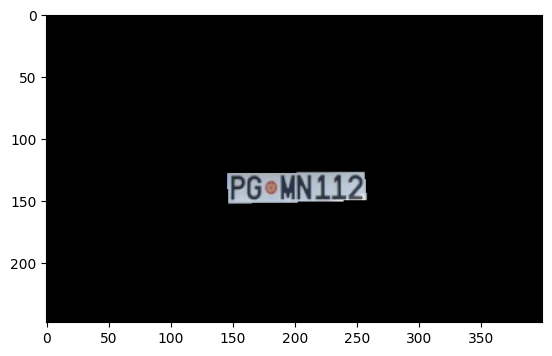

In [6]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [7]:
location

array([[[146, 128]],

       [[256, 127]],

       [[258, 149]],

       [[147, 152]]], dtype=int32)

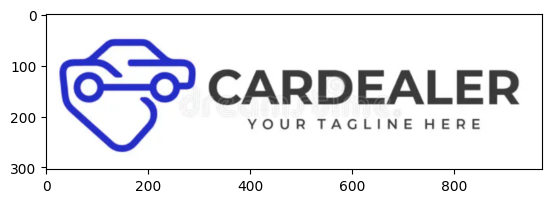

In [8]:
logo  = cv2.imread("logo.png")
plt.imshow(logo) 

In [11]:
img[location:]

TypeError: only integer scalar arrays can be converted to a scalar index

In [13]:
location[0]

array([[146, 128]], dtype=int32)

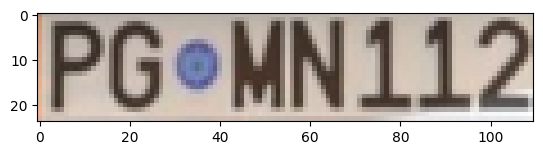

In [23]:
plt.imshow(img[128:152,146:256,:]) 

array([[146, 128]], dtype=int32)

ValueError: could not broadcast input array from shape (304,974,3) into shape (24,110,3)

In [28]:
dim = (110, 24)
resized = cv2.resize(logo, dim, interpolation = cv2.INTER_AREA)
img[128:152,146:256,:] = resized

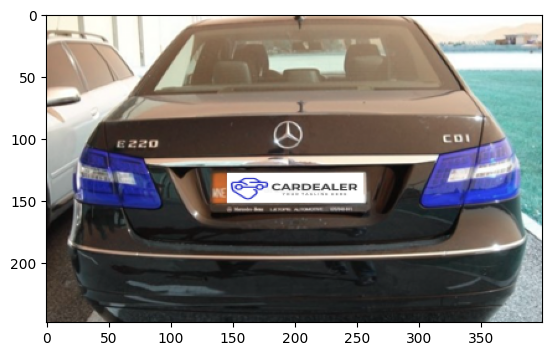

In [29]:
plt.imshow(img)